# Ejercicio 1
Realice un programa que permita el entrenamiento y prueba de un perceptrón simple con una cantidad variable de
entradas. El programa debe proveer las siguientes facilidades:
 1. lectura de los patrones de entrenamiento (entradas y salidas) desde un archivo en formato texto separado por comas
 2. selección del criterio de finalización del entrenamiento,
 3. selección del número máximo de épocas de entrenamiento,
 4. selección de la tasa de aprendizaje,
 5. prueba del perceptrón entrenado mediante archivos de texto con el mismo formato separado por comas.

Realizar la prueba: Recuerde que para que la prueba tenga validez se deben utilizar patrones nunca presentados en el entrenamiento, para esto se dispone de dos archivos diferentes para cada problema.

Implemente una rutina de graficación que permita visualizar, para el caso de dos entradas, los patrones utilizados y
la recta de separación que se va ajustando durante el entrenamiento del perceptrón simple. Utilice dicha rutina para
visualizar el entrenamiento en los problemas OR y XOR.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Train

In [78]:
def perceptron_simple_train(ds_train,N,nu,gamma,N_valid):
    # ds_test=np.concatenate([-np.ones(ds_test.shape[0]), ds_test])
    # ds_train=np.concatenate([-np.ones(ds_train.shape[0]), ds_train])

    # inicializacion de pesos al azar
    w = np.random.rand(ds_train.shape[1]) - 0.5

    error_epocas = []
    w_epocas = w

    # épocas
    for i in range(N):
        for patron in ds_train:
            a = patron
            patron = np.concatenate([[-1], patron])
            # Convolución
            n_entradas = len(patron) - 1
            y = np.dot(patron[0:n_entradas],w)
            # No linealidad
            if (y > 0):
                y = 1
            else:
                y = -1
            # Actualización de pesos
            w = w + patron[0:n_entradas] * gamma * (patron[-1] - y)

        # Validación
        errores = 0
        for j in ds_train[np.random.randint(0, ds_train.shape[0], size=N_valid)]:
            j = np.concatenate([[-1], j])
            # Convolución
            y = np.dot(j[0:len(j)-1],w)
            
            # No linealidad
            if (y > 0 and 1 != j[len(j)-1]):
                errores += 1
            elif (y <= 0 and -1 != j[len(j)-1]):
                errores += 1
        error = (errores/200)

        error_epocas= np.append(error_epocas, [error])
        w_epocas = np.vstack((w_epocas, w))
        
        # print(f'Epoca {i}: error = {error}, w = {w}')
        if (error < nu):
            print(f'Época {i}')
            return w_epocas, error_epocas
    print(f'Época {i}')
    return w_epocas, error_epocas

## Test

In [46]:
def perceptron_test(ds_test,w):
    errores = 0
    for j in ds_test:
        j = np.concatenate([[-1], j])
        # Convolución
        y = np.dot(j[0:len(j)-1],w)
        # No linealidad
        if (y > 0 and 1 != j[len(j)-1]):
            errores += 1
        elif (y <= 0 and -1 != j[len(j)-1]):
            errores += 1
    return (errores/ds_test.shape[0])


## Graficación

Implemente una rutina de graficación que permita visualizar, para el caso de dos entradas, los patrones utilizados y
la recta de separación que se va ajustando durante el entrenamiento del perceptrón simple. Utilice dicha rutina para
visualizar el entrenamiento en los problemas OR y XOR.

In [4]:
import time
import matplotlib.animation as animation
%matplotlib widget

In [52]:
def graficar(x, y, x_color, w_vec, error):
    N_epocas = w_vec.shape[0]
    x_recta = np.arange(-3, 3, 0.01)
    pendiente = -w_vec[0,1]/w_vec[0,2]
    ordenada = w_vec[0,0]/w_vec[0,2]
    recta =  ordenada + pendiente * x_recta
    fig, ax = plt.subplots(figsize=(4,3))
    line1, = ax.plot(x_recta, recta)
    ax.grid()
    ax.scatter(x, y, c = x_color)
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])

    def animate(i):
        pendiente = -w_vec[i,1]/w_vec[i,2]
        ordenada = w_vec[i,0]/w_vec[i,2]
        recta =  ordenada + pendiente * x_recta
        line1.set_ydata(recta)
        plt.title(f'recta = {np.round(pendiente, 4)}x + {np.round(ordenada,4)}, error: {error}')
        time.sleep(0.2)
        return line1,
    
    anim = animation.FuncAnimation(fig, animate, frames=N_epocas, interval=20, repeat=False)
    plt.show()
    #pause
    anim.event_source.stop()



## Prueba
### Problema OR

In [51]:
# lectura de patrones

ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

# Entrenamiento
N = 50 # Epocas
gamma = 0.00001 # Tasa de aprendizaje
nu = 0.005 # Umbral de error
N_valid = 200
historial_w, errores_evol = perceptron_simple_train(ds_train,N,nu,gamma,N_valid)

# Test
w = historial_w[-1]
error = perceptron_test(ds_test,w)
print(f'Error de test: {error}')

Época 29
Error de test: 0.015


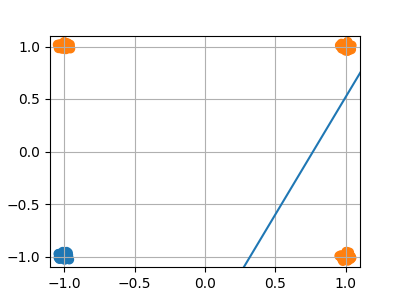

In [56]:
# Graficacion
x_x = ds_test[:,0]
x_y = ds_test[:,1]
x_color = np.where(x_x < 0, np.where(x_y < 0, 'C0', 'C1'), 'C1')
graficar(x_x, x_y, x_color, historial_w, error)



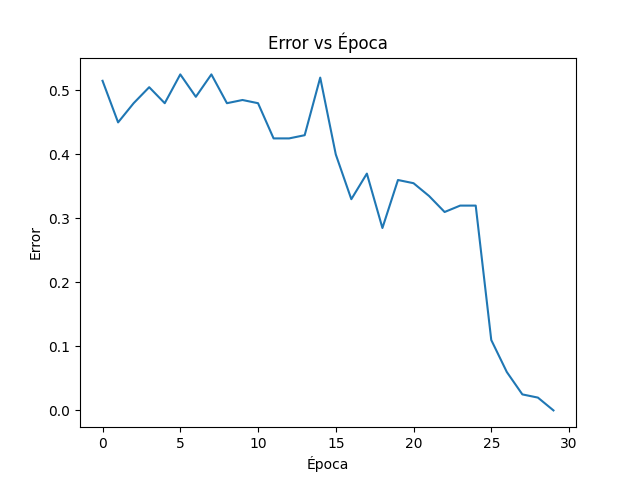

In [57]:
plt.close('all')
plt.title('Error vs Época')
plt.xlabel('Época')
plt.ylabel('Error')
plt.plot(range(len(errores_evol)),errores_evol)
plt.show()

### Problema XOR

In [58]:
# Lectura de patrones

ds_train = np.genfromtxt('icgtp1datos/XOR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/XOR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

# Entrenamiento
N = 25 # Epocas
gamma = 0.001 # Tasa de aprendizaje
nu = 0.5 # Umbral de error
N_valid=200
historial_w, errores_evol = perceptron_simple_train(ds_train,N,nu,gamma,N_valid)

# Test
w = historial_w[-1]
error = perceptron_test(ds_test,w)
print(f'Error de test: {error}')

Época 0
Error de test: 0.43


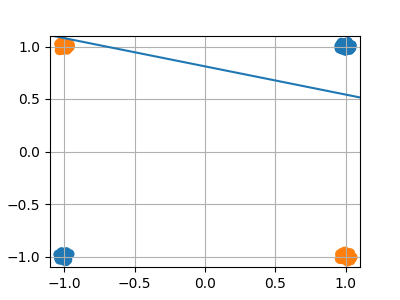

In [59]:
# Graficacion
x_x = ds_test[:,0]
x_y = ds_test[:,1]
x_color = np.where(x_x > 0, np.where(x_y > 0, 'C0', 'C1'), np.where(x_y < 0, 'C0', 'C1'))
graficar(x_x, x_y, x_color, historial_w, errores_evol)

# Ejercicio 2
## Generación de particiones

In [60]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test),dtype = int)
    M_train = np.zeros((n, n_train),dtype = int)

    for i in range(n):
        idx = range(ds.shape[0])
        idx=np.random.choice(range(ds.shape[0]),ds.shape[0],replace = False)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return (ds, M_test, M_train)


## Validación cruzada con 5 particiones
El archivo $spheres1d10.csv$ contiene una serie de datos generados a partir de los valores de la Tabla 1, con pequeñas desviaciones aleatorias ($< 10 %$) en torno a ellos. 
Realice con estos datos la validación cruzada del perceptrón simple con $5$ particiones de entrenamiento y prueba con relacion $80/20$

Época 2
Época 2
Época 4
Época 0
Época 8


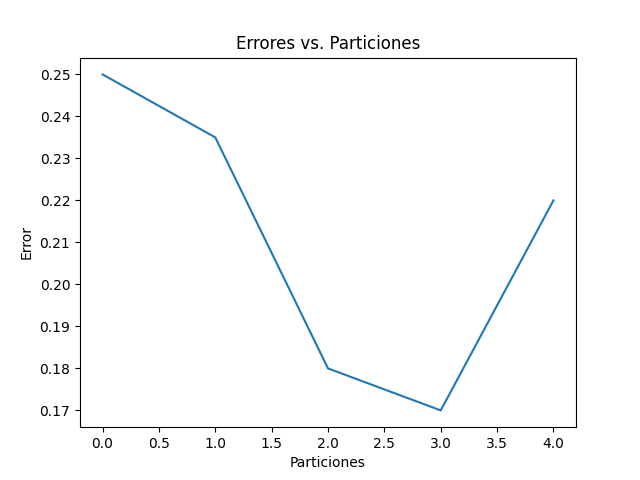

In [79]:
num_particiones=5
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres1d10.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],30,0.1,0.01,100)
    w_particion[i] = historial_w[-1]

errores=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores[i]= perceptron_test(ds[particion],w_particion[i])

plt.close('all')
plt.plot(range(num_particiones),errores)
plt.title('Errores vs. Particiones')
plt.xlabel('Particiones')
plt.ylabel('Error')
plt.show()

## Validación cruzada con 10 particiones
A partir de la misma tabla del ejemplo anterior, pero modificando el punto x = [−1 + 1 −1] → yd = 1, se ha generado un conjunto de datos diferente. Los archivos spheres2d10.csv, spheres2d50.csv y spheres2d70.csv contienen los datos con desviaciones aleatorias de 10, 50 y 70 % respectivamente (Figuras 2(b), 2(c) y 2(d)). 

Realice la validación cruzada del perceptrón simple con 10 particiones de entrenamiento y prueba, con relación 80/20.


In [82]:
num_particiones=10
#particion de 10% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d10.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d10=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],20,0.03,0.01,100)                       
    w_particion_2d10[i]= historial_w[-1]

errores_2d10=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d10[i]= perceptron_test(ds[particion],w_particion_2d10[i])

#particion de 50% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d50.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d50=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],20,0.03,0.01,100)                       
    w_particion_2d50[i]= historial_w[-1]


errores_2d50=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d50[i]= perceptron_test(ds[particion],w_particion_2d50[i])

#particion de 70% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d70.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d70=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    historial_w, errores_evol = perceptron_simple_train(ds[particion],20,0.03,0.01,100)                       
    w_particion_2d70[i] = historial_w[-1]


errores_2d70=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d70[i]= perceptron_test(ds[particion],w_particion_2d70[i])

Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0
Época 0


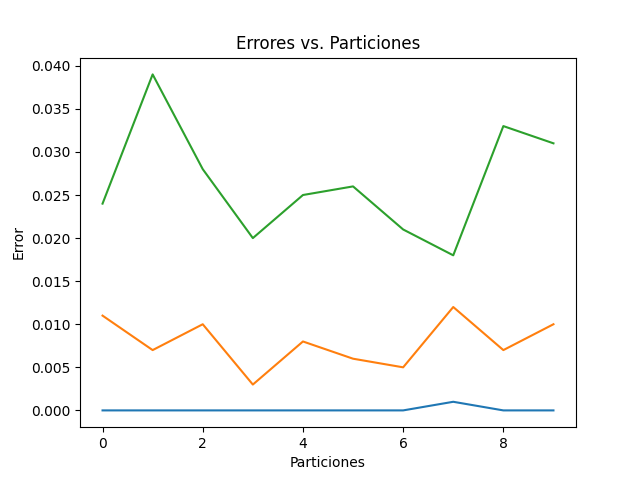

In [34]:
plt.close('all')
plt.plot(range(num_particiones),errores_2d10)
plt.plot(range(num_particiones),errores_2d50)
plt.plot(range(num_particiones),errores_2d70)
plt.title('Errores vs. Particiones')
plt.xlabel('Particiones')
plt.ylabel('Error')
plt.show()

In [81]:
print(f'media desviación 10%: {np.mean(errores_2d10):.4f} - desvío: {np.std(errores_2d10):.4f}')
print(f'media desviación 50%: {np.mean(errores_2d50):.4f} - desvío: {np.std(errores_2d50):.4f}')
print(f'media desviación 70%: {np.mean(errores_2d70):.4f} - desvío: {np.std(errores_2d70):.4f}')

media desviación 10%: 0.0000 - desvío: 0.0000
media desviación 50%: 0.0084 - desvío: 0.0034
media desviación 70%: 0.0223 - desvío: 0.0071
